In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

# Data Pre-processing
### Import Time Series Data

In [ ]:
def preprocess(year): # note that month need to contain 2 characters such as 01 or 11.
    """
        read the footfall data and resample the time to one hour unit.
        
    """    
    for month in range(12):
        if month < 9 :
            FFraw = pd.read_csv(year + '/' + year + '-0' + str(month + 1) + '.csv')
            
            FFraw['timestamp'] = FFraw['timestamp'].str.replace('T', ' ')
            FFraw['timestamp'] = FFraw['timestamp'].str.replace('Z', '')
            FFraw.timestamp = pd.to_datetime(FFraw.timestamp, format = '%Y-%m-%d %H:%M:%S')

            FFraw.index = FFraw.timestamp # extract features from timestamp
            FFraw['year'] = FFraw.timestamp.dt.year
            FFraw['month'] = FFraw.timestamp.dt.month
            FFraw['day'] = FFraw.timestamp.dt.day
            FFraw['hour'] = FFraw.timestamp.dt.hour
            FFraw['day_of_week'] = FFraw.timestamp.dt.dayofweek + 1

            FFraw_h = FFraw.groupby('location').resample('H').mean() # resample the time to one hour
            FFraw_h.footfall = FFraw_h.footfall * 12

            FF_preprocess = FFraw_h.reset_index(level = ['timestamp'])
            FF_preprocess = FF_preprocess.reset_index(drop = True)
            FF_preprocess.to_csv('preprocessing/'+ year + '-0' + str(month + 1) + '.csv')

        else:
            FFraw = pd.read_csv(year + '/' + year + '-' + str(month + 1) + '.csv')
            
            FFraw['timestamp'] = FFraw['timestamp'].str.replace('T', ' ')
            FFraw['timestamp'] = FFraw['timestamp'].str.replace('Z', '')
            FFraw.timestamp = pd.to_datetime(FFraw.timestamp, format = '%Y-%m-%d %H:%M:%S')

            FFraw.index = FFraw.timestamp
            FFraw['year'] = FFraw.timestamp.dt.year
            FFraw['month'] = FFraw.timestamp.dt.month
            FFraw['day'] = FFraw.timestamp.dt.day
            FFraw['hour'] = FFraw.timestamp.dt.hour
            FFraw['day_of_week'] = FFraw.timestamp.dt.dayofweek + 1

            FFraw_h = FFraw.groupby('location').resample('H').mean()
            FFraw_h.footfall = FFraw_h.footfall * 12

            FF_preprocess = FFraw_h.reset_index(level = ['timestamp'])
            FF_preprocess = FF_preprocess.reset_index(drop = True)
            FF_preprocess.to_csv('preprocessing/'+ year + '-' + str(month + 1) + '.csv')


In [ ]:
def stack_footfall(year):
    footfall = pd.read_csv('preprocessing/'+ year +'-01.csv', index_col = 0)
    
    for i in range(11):
        if i < 8:
            footfall = footfall.append(
                pd.read_csv('preprocessing/'+ year +'-0' + str(i + 2) + '.csv', index_col = 0))
        else:
            footfall = footfall.append(
                pd.read_csv('preprocessing/'+ year +'-' + str(i + 2) + '.csv', index_col = 0)) 
            
    footfall = footfall.dropna(how = 'any', axis = 0)
    footfall.timestamp = pd.to_datetime(footfall.timestamp, format = '%Y-%m-%d %H:%M:%S') 
    
    return footfall

In [ ]:
preprocess('2018')
preprocess('2019')
preprocess('2020')

In [ ]:
ff2018 = stack_footfall('2018')
ff2018

In [ ]:
ff2019 = stack_footfall('2019')
ff2019

In [ ]:
ff2020 = stack_footfall('2020')
ff2020

In [ ]:
print('There are', ff2018.location.nunique(), 'detected retail areas in the 2018 footfall data.')
print('There are', ff2019.location.nunique(), 'detected retail areas in the 2019 footfall data.')
print('There are', ff2020.location.nunique(), 'detected retail areas in the 2020 footfall data.')

In [ ]:
loc2018 = ff2018.location.unique()
loc2019 = ff2019.location.unique()
loc2020 = ff2020.location.unique()

loc1 = np.intersect1d(loc2018, loc2019)
loc = np.intersect1d(loc1, loc2020)

ff2018_loc = ff2018[0:1]
ff2018_loc = ff2018_loc.drop([0,0])
ff2018_loc

In [ ]:
j = 0

for i in ff2018.location:
    j = j + 1
    if i in loc:
        ff2018_loc = ff2018_loc.append(ff2018[j - 1 : j])

ff2018_loc

### Merge Data

In [8]:
ff = ff2018.append(ff2019).append(ff2020)

# Statistical Analysis

<AxesSubplot:title={'center':'Footfall Count'}, xlabel='timestamp'>

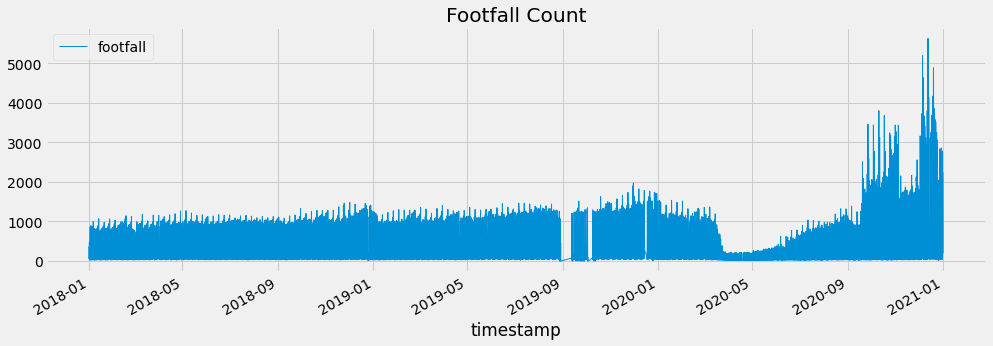

In [9]:
ff = ff.reset_index(drop = True)
ff_sum = ff.groupby('timestamp')['footfall'].mean().to_frame()
ff_sum.plot(figsize =(15,5), title = "Footfall Count", fontsize = 14, linewidth = 1)

a lot missing data in year 2019.

- narrow the time to 2018-01-05 to 2019-08-25

<AxesSubplot:title={'center':'Footfall Count'}, xlabel='timestamp'>

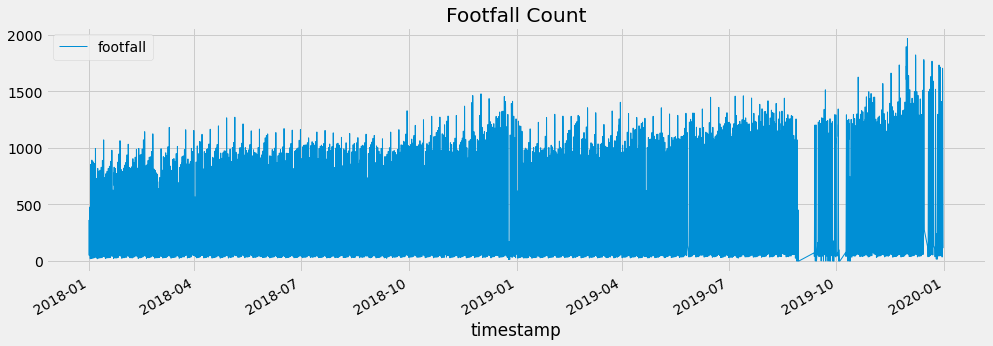

In [10]:
ff = ff.loc[(ff.timestamp >= '2018-01') & (ff.timestamp <= '2019-12-31')]

ff = ff.reset_index(drop = True)
ff_sum = ff.groupby('timestamp')['footfall'].mean().to_frame()
ff_sum.plot(figsize =(15,5), title = "Footfall Count", fontsize = 14, linewidth = 1)

In [11]:
import seaborn as sns
import os
import statistics

Text(0.5, 0, 'Footfall Counts Distribution')

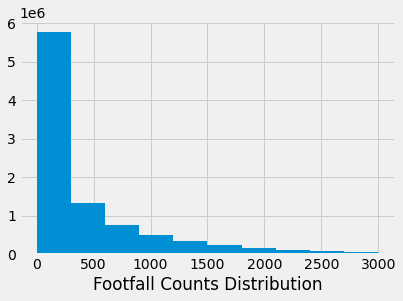

In [12]:
ff.loc[ff['footfall'] <= 3000]['footfall'].hist()
plt.xlabel('Footfall Counts Distribution')

In [13]:
ff_sum = ff.groupby('timestamp')['footfall'].mean().to_frame()

#Hourly
hourly = ff_sum.resample('H').mean()

#Daily
daily = ff_sum.resample('D').mean()

#Weekly
weekly = ff_sum.resample('W').mean()

#Monthly
monthly = ff_sum.resample('M').mean()

Text(0.5, 0, 'Footfall Counts Distribution by Daily Mean')

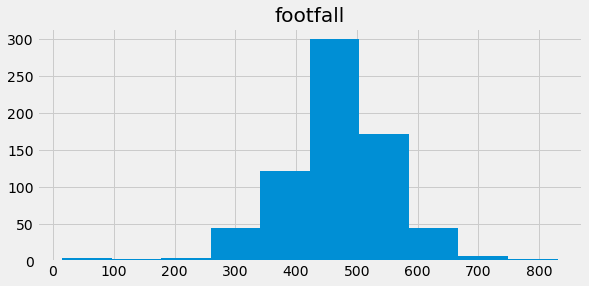

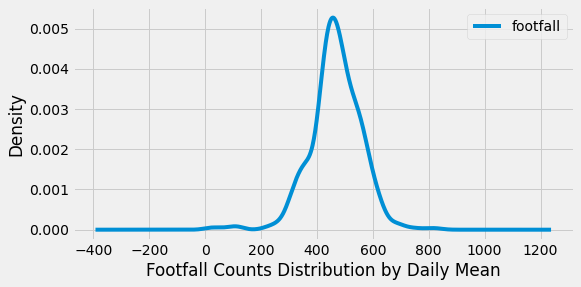

In [14]:
daily.hist(figsize = (8.7,4))
daily.plot(figsize = (8,4), kind='kde')
plt.xlabel('Footfall Counts Distribution by Daily Mean')

<AxesSubplot:xlabel='year'>

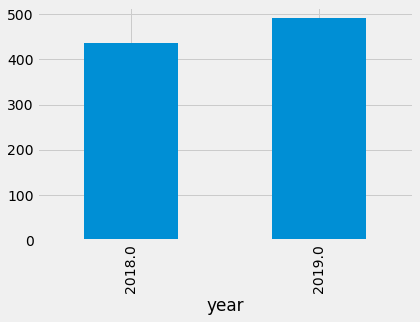

In [15]:
ff.groupby('year')['footfall'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

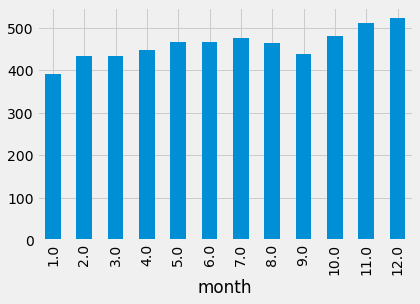

In [16]:
ff.groupby('month')['footfall'].mean().plot.bar()

<AxesSubplot:title={'center':'Footfall Count(Monthwise)'}, xlabel='year,month'>

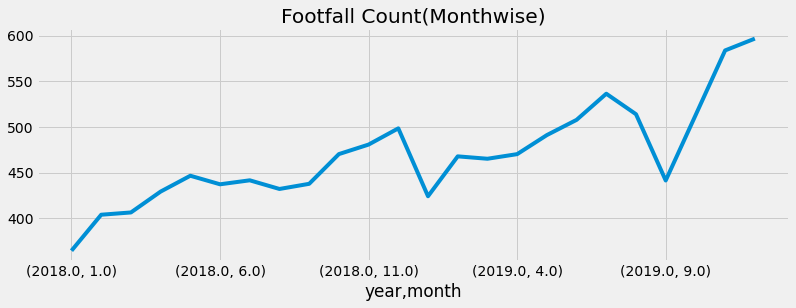

In [17]:
temp = ff.groupby(['year', 'month'])['footfall'].mean()
temp.plot(figsize =(12,4), title = "Footfall Count(Monthwise)", fontsize = 14)

<AxesSubplot:xlabel='day'>

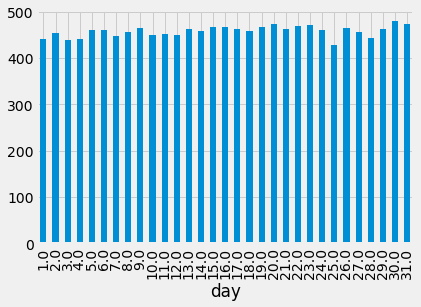

In [18]:
ff.groupby('day') ['footfall'].mean().plot.bar()

<AxesSubplot:xlabel='day_of_week'>

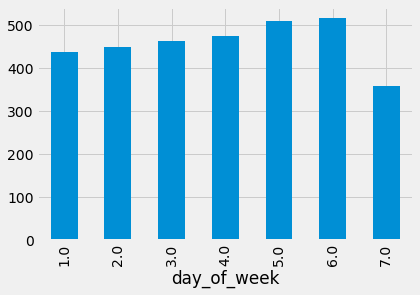

In [19]:
ff.groupby('day_of_week')['footfall'].mean().plot.bar()

<AxesSubplot:xlabel='hour'>

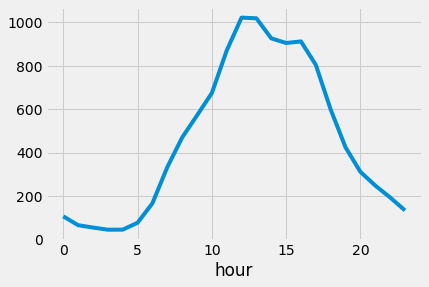

In [20]:
ff.groupby('hour')['footfall'].mean().plot.line()

<AxesSubplot:title={'center':'Monthly'}, xlabel='timestamp'>

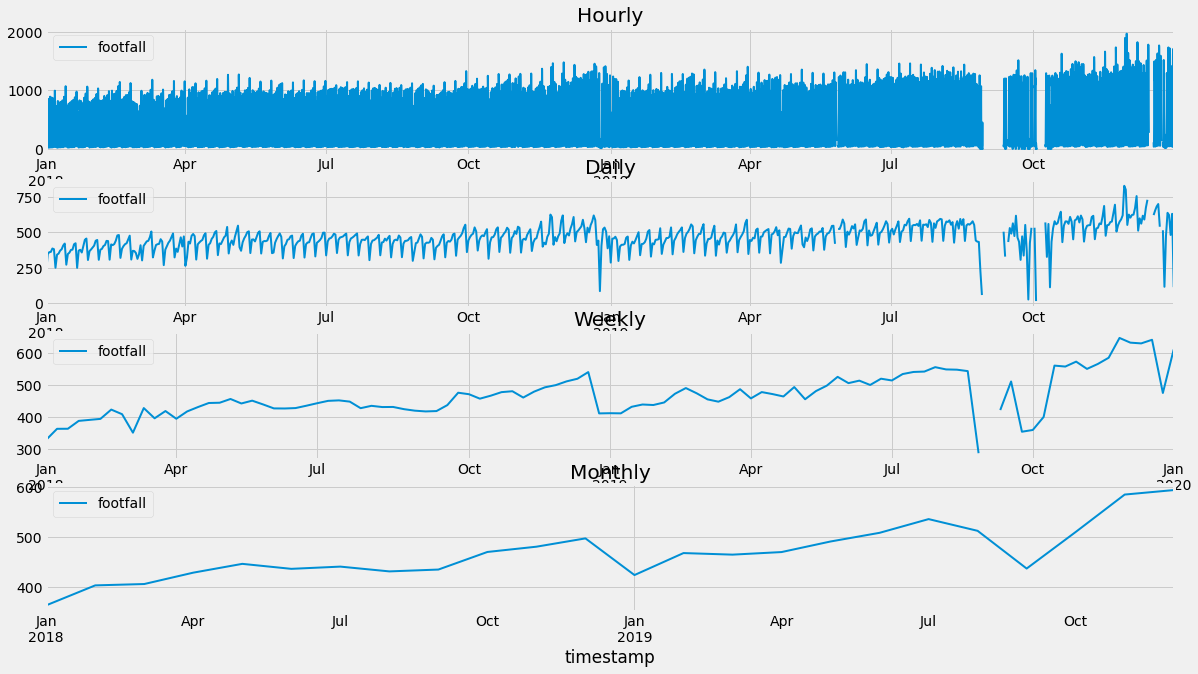

In [21]:
fig,axs = plt.subplots(4,1)

hourly.plot(figsize = (18,10), title = "Hourly", fontsize = 14, ax = axs[0], linewidth = 2)
daily.plot(figsize = (18,10), title = "Daily", fontsize = 14, ax = axs[1], linewidth = 2)
weekly.plot(figsize = (18,10), title = "Weekly", fontsize = 14, ax = axs[2], linewidth = 2)
monthly.plot(figsize = (18,10), title = "Monthly", fontsize = 14, ax = axs[3], linewidth = 2)

# Time Series Forecasting
## Case Study -- Location 639 (163 High Street):

In [3]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import TimeSeriesSplit

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions

In [23]:
sort_count = ff.groupby('location')['footfall']\
                    .count()\
                    .sort_values(ascending = False)\
                    .index
sort_count[0:50]

Float64Index([1014.0,  818.0,  958.0,  888.0,  871.0,  848.0, 1012.0,  960.0,
               127.0,  961.0,  946.0,  450.0,  890.0,  639.0,  900.0, 1017.0,
               605.0,  281.0,  782.0, 1050.0,  897.0, 1013.0,  856.0,  950.0,
               581.0,  852.0,  984.0,  711.0,  618.0,  857.0,  448.0,  715.0,
               906.0,  895.0,  452.0, 1030.0,  853.0,  114.0,  717.0,  491.0,
               502.0,  974.0,   31.0,  526.0,  938.0,  972.0,  726.0,  880.0,
              1020.0,  521.0],
             dtype='float64', name='location')

<Figure size 864x288 with 0 Axes>

- choose location 639 <br>
- narrow the date range to 2018-01-01 to 2019-08-25 to aviod missing data.
- narrow the time range to 5:00 to 20:00 to aviod late foofall on Friday

In [66]:
loc = 639
ff639 = ff.loc[(ff.location <= loc) & (ff.location >= loc) & 
               (ff.timestamp >= '2018-01') & (ff.timestamp <= '2019-08-25') &
               (ff.hour <= 20) & (ff.hour >= 5)]
ff639.index = ff639.timestamp
ff639.head()

,timestamp,location,device,footfall,year,month,day,hour,day_of_week
timestamp,,,,,,,,,
2018-01-01 05:00:00,2018-01-01 05:00:00,3.0,1032.0,127.0,2018.0,1.0,1.0,5.0,1.0
2018-01-01 06:00:00,2018-01-01 06:00:00,3.0,1032.0,245.0,2018.0,1.0,1.0,6.0,1.0
2018-01-01 07:00:00,2018-01-01 07:00:00,3.0,1032.0,170.0,2018.0,1.0,1.0,7.0,1.0
2018-01-01 08:00:00,2018-01-01 08:00:00,3.0,1032.0,228.0,2018.0,1.0,1.0,8.0,1.0
2018-01-01 09:00:00,2018-01-01 09:00:00,3.0,1032.0,275.0,2018.0,1.0,1.0,9.0,1.0


Text(0, 0.5, 'Footfall Count')

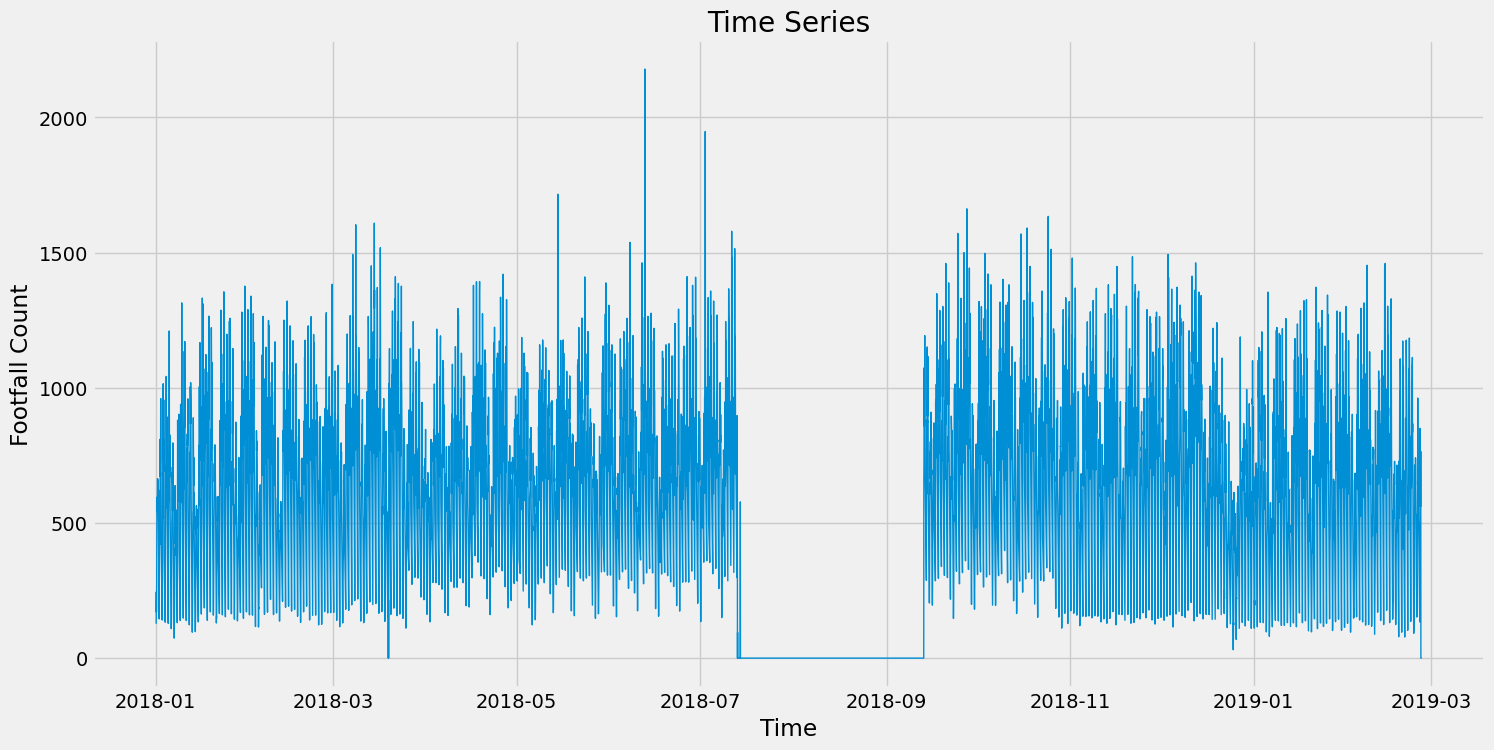

In [67]:
ff639_plot = ff639['footfall']
plt.figure(figsize = (16,8))
plt.plot(ff639_plot, linewidth = 1)
plt.title("Time Series")
plt.xlabel("Time")
plt.ylabel("Footfall Count")

- split the data to Monday to Friday and Weekends.

### Check Stationarity

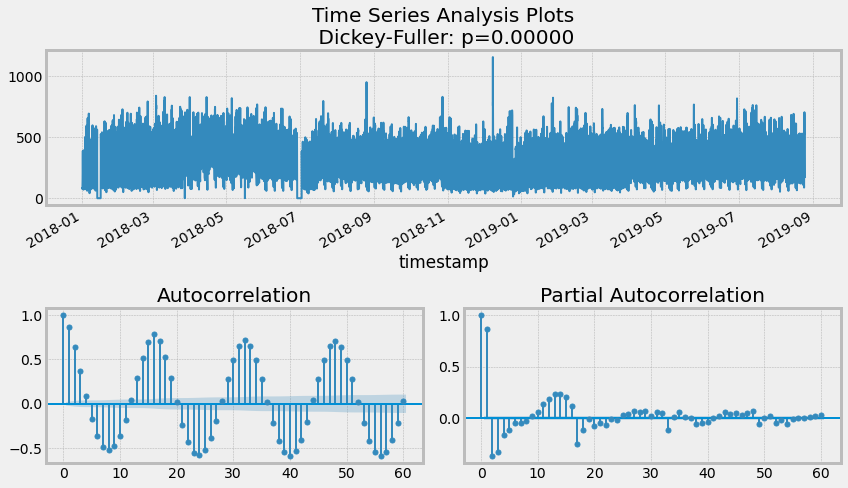

In [26]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(ff639_plot, lags=60)

- Results show our initial series are **stationary**, Dickey-Fuller test rejected null hypothesis that 
a unit root is present.<br> It can be seen on the plot itself — we don’t have a visible trend, so the mean is
constant, and the variance is pretty much stable throughout the series.

### Divide Data into Training and Validation

In [27]:
train = ff639.loc[(ff639.timestamp >= '2018-01-01 00:00:00') & (ff639.timestamp <= '2019-08-18 23:55:00')]
valid = ff639.loc[(ff639.timestamp >= '2019-08-19 00:00:00') & (ff639.timestamp <= '2019-08-25 23:55:00')]

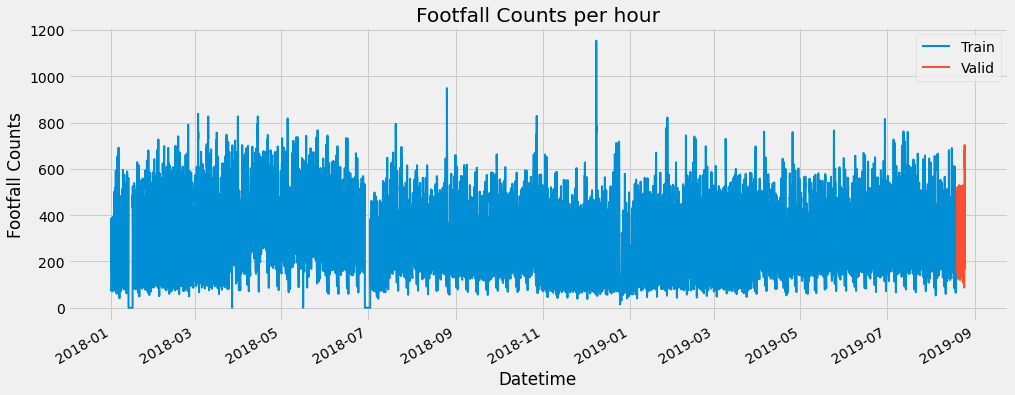

In [28]:
train['footfall'].plot(figsize = (15,6), title = 'Footfall Counts per hour', fontsize = 14, label = 'Train', linewidth = 2)
valid['footfall'].plot(figsize = (15,6), title = 'Footfall Counts per hour', fontsize =14, label = 'Valid', linewidth = 2)
plt.xlabel('Datetime')
plt.ylabel('Footfall Counts')
plt.legend(loc = 'best')

In [35]:
from math import sqrt

def rmse(y_true, y_pred):
    squared_error = 0
    for i in range(len(y_true)):
        squared_error = squared_error + (y_true[i] - y_pred[i]) ** 2
    root_mean_squared_error = sqrt(squared_error / len(y_true))
    return root_mean_squared_error

### 1. Naive Approach

The value of Naive forecast is simply equal to the last observation.<br>
Below is a seasonal (daily) naive forecast:

Text(0.5, 1.0, 'Naive Forecast')

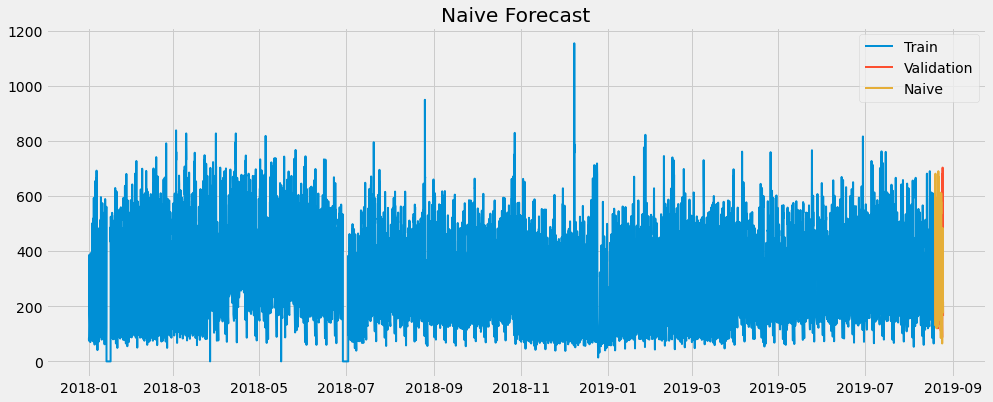

In [30]:
dd = np.asarray(train['footfall'])
y_hat = valid.copy()
y_hat['naive']= dd[len(dd)- 1]
for i in range(len(valid)): 
    y_hat['naive'][i]= dd[len(dd) - len(valid) + i]
    
plt.figure(figsize = (15,6))
plt.plot(train.index, train['footfall'], label = 'Train', linewidth = 2)
plt.plot(valid.index, valid['footfall'], label = 'Validation', linewidth = 2)
plt.plot(y_hat.index, y_hat['naive'], label = 'Naive', linewidth = 2)
plt.legend(loc = 'best')
plt.title('Naive Forecast')

#### ***Calculate RMSE for Naive Approach:***

In [31]:
naive_rmse = rmse(valid.footfall, y_hat.naive)
naive_rmse

99.35138608326844

In [32]:
a = rmse / (max(valid.footfall) - min(valid.footfall))
a

0.16128471766764357

### 2. Moving Average Approach

#### Consider Seasonality (Daliy Fluctuations)

In [33]:
def moving_avg(rounds):
    y_hat['avg'] = 0
    for i in range(len(valid)):
        y_pred = 0
        for j in range(rounds):
            y_pred = y_pred + train.footfall[len(train) - (j + 1) * len(valid) + i]
        y_hat['avg'][i] = y_pred / rounds
    
    plt.figure(figsize = (15,5))
    plt.plot(train.footfall, label = 'Train', linewidth = 2)
    plt.plot(valid.footfall, label = 'Validation', linewidth = 2)
    plt.plot(y_hat['avg'], label = 'Monving Average Forecast with ' + str(rounds) + ' Weeks Observations', linewidth = 2)
    plt.legend(loc = 'best')
    plt.show()
    
    avg_rmse = rmse(valid.footfall, y_hat.avg)
    print('RMSE equals', avg_rmse)

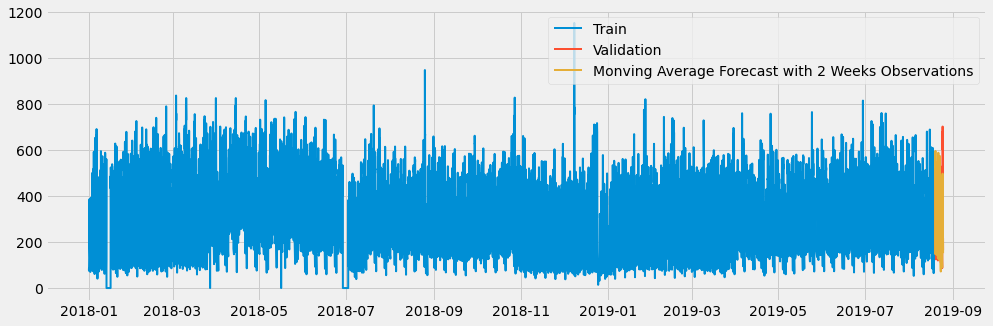

RMSE equals 80.87149013506965


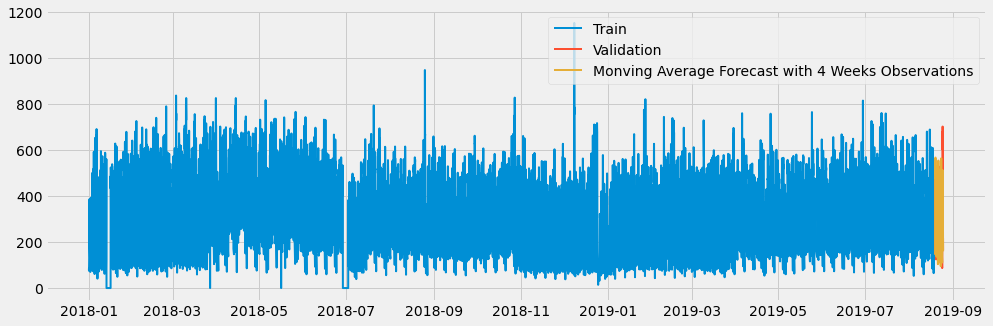

RMSE equals 66.20320674509153


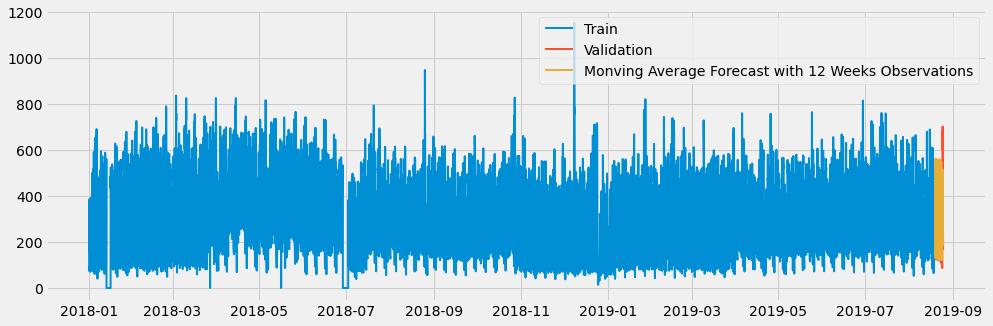

RMSE equals 60.318080484489336


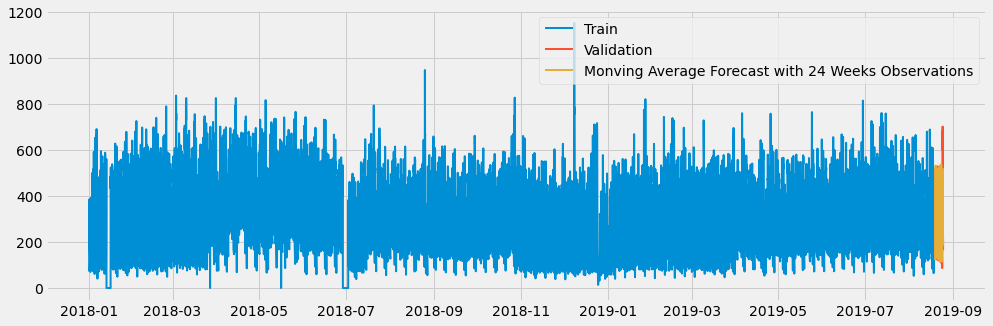

RMSE equals 54.52923527796809


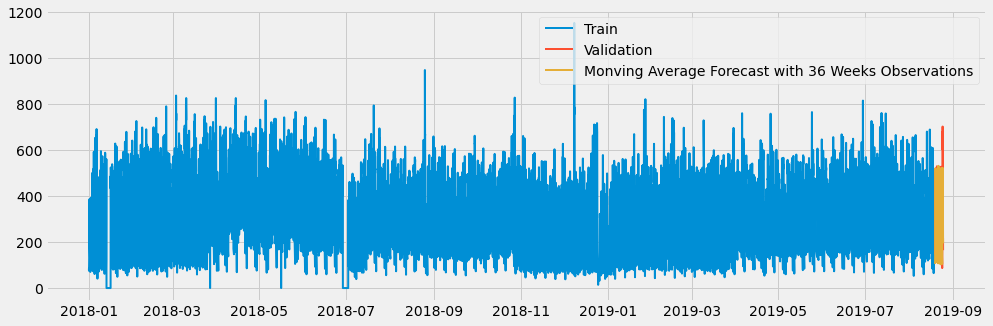

RMSE equals 53.703371247374534


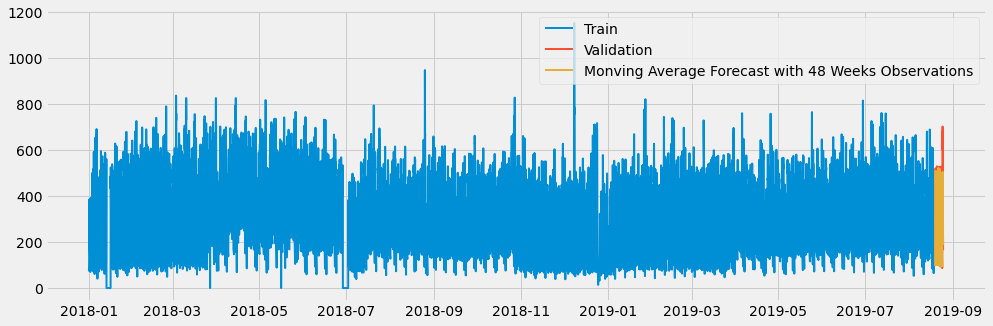

RMSE equals 55.90877987102443


In [36]:
moving_avg(2)
moving_avg(4)
moving_avg(12)
moving_avg(24)
moving_avg(36)
moving_avg(48)

### 3. Exponential Smoothing

#### Holt-Winters’ Seasonal Method

E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


RMSE for Holt Winters seasonal forecast is  130.3266640923334


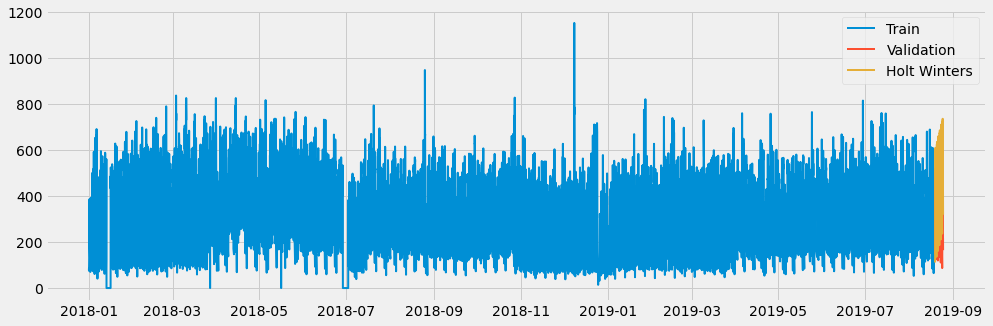

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

y_hat = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(train.footfall), seasonal_periods = 16, trend = 'add', seasonal= 'add').fit()
y_hat['Holt_Winter'] = fit1.forecast(len(valid))

plt.figure(figsize = (15,5))
plt.plot(train.footfall, label = 'Train', linewidth = 2)
plt.plot(valid.footfall, label = 'Validation', linewidth = 2)
plt.plot(y_hat.Holt_Winter, label = 'Holt Winters', linewidth = 2)
plt.legend(loc = 'best')

rmse_hw = rmse(valid.footfall, y_hat.Holt_Winter)
print('RMSE for Holt Winters seasonal forecast is ', rmse_hw)

### 4. ARIMA Model

In [38]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
    rolmean = pd.Series(timeseries).rolling(window = 168).mean()
    rolstd = pd.Series(timeseries).rolling(window = 168).std()
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    
    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

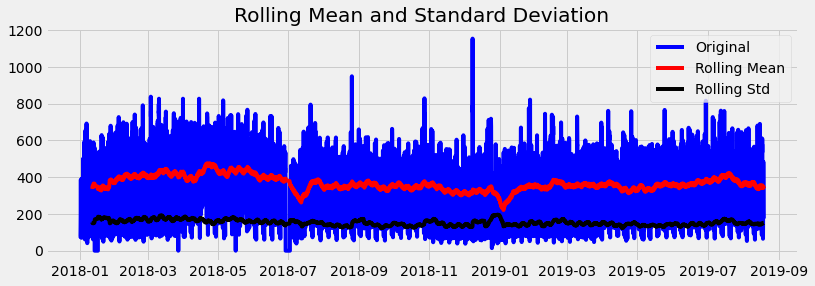

Results of Dickey Fuller test: 
Test Statistics               -1.083751e+01
p-value                        1.647647e-19
# Lag Used                     3.800000e+01
Number of Observations Used    9.385000e+03
Critical Value (1%)           -3.431047e+00
Critical Value (5%)           -2.861848e+00
Critical Value (10%)          -2.566934e+00
dtype: float64


In [39]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (12,4)
test_stationary(train['footfall'])

#### ***Decompose***

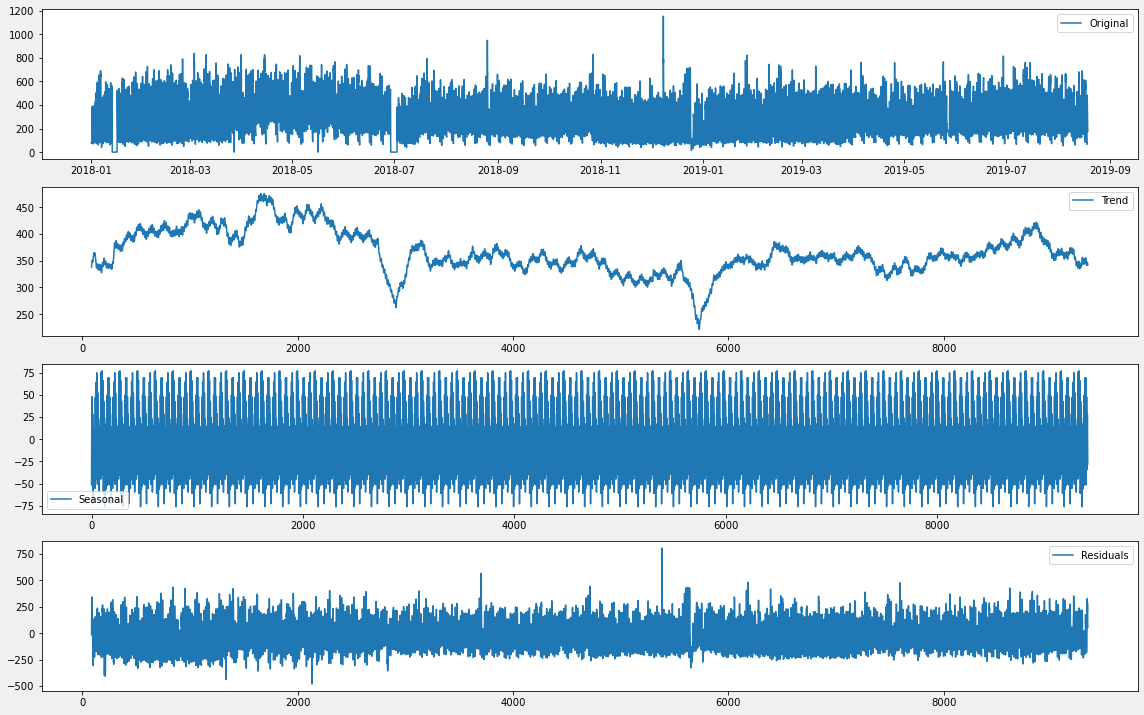

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (16,10))
decomposition = seasonal_decompose(pd.DataFrame(train).footfall.values, freq = 168) # 1 week
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train.footfall, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

#### ***Stationarity of residuals:***

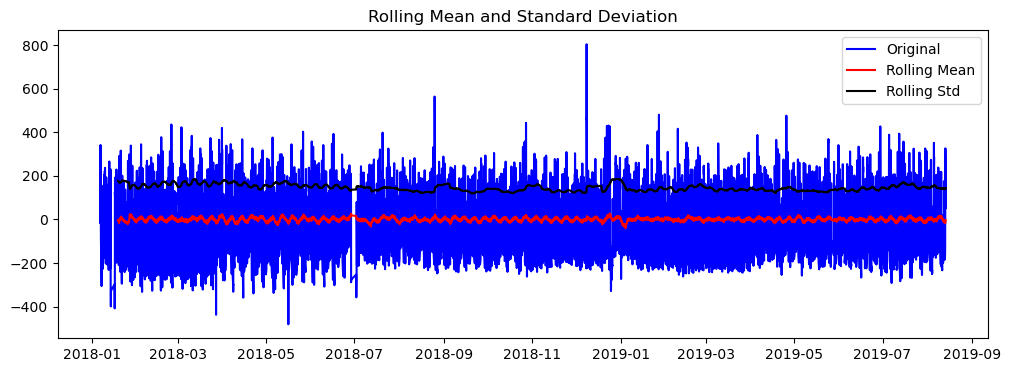

Results of Dickey Fuller test: 
Test Statistics               -1.879430e+01
p-value                        2.023249e-30
# Lag Used                     3.800000e+01
Number of Observations Used    9.217000e+03
Critical Value (1%)           -3.431060e+00
Critical Value (5%)           -2.861854e+00
Critical Value (10%)          -2.566937e+00
dtype: float64


In [41]:
plt.figure(figsize = (12,4))
train_decompose = pd.DataFrame(residual)
train_decompose['date'] = train.index
train_decompose.set_index('date', inplace = True)
train_decompose.dropna(inplace = True)
test_stationary(train_decompose[0])

#### ***Differncing Analyzing:***

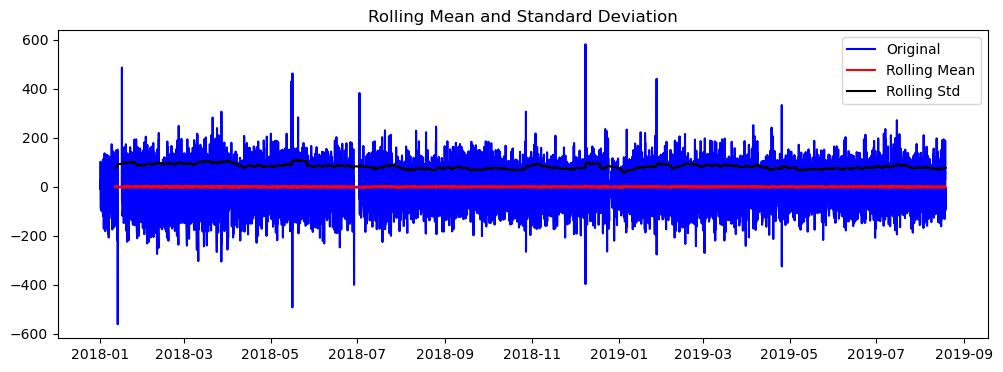

Results of Dickey Fuller test: 
Test Statistics                 -21.280135
p-value                           0.000000
# Lag Used                       38.000000
Number of Observations Used    9384.000000
Critical Value (1%)              -3.431047
Critical Value (5%)              -2.861848
Critical Value (10%)             -2.566934
dtype: float64


In [42]:
train_diff = train.footfall - train.footfall.shift(1)
rcParams['figure.figsize'] = (12,4)
test_stationary(train_diff.dropna())

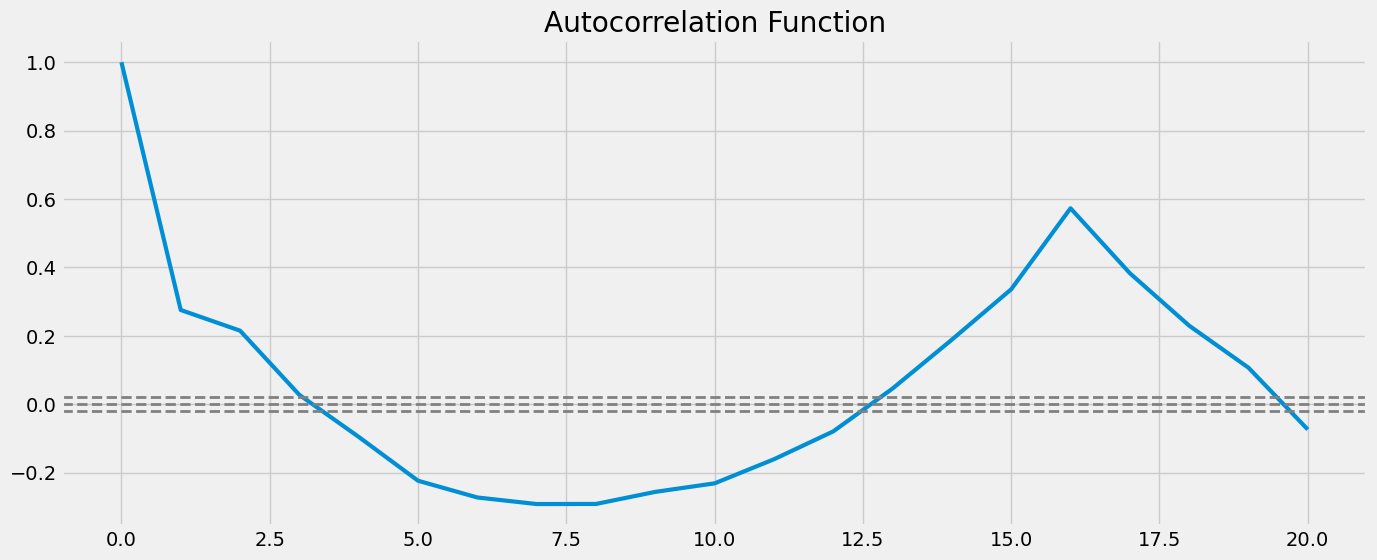

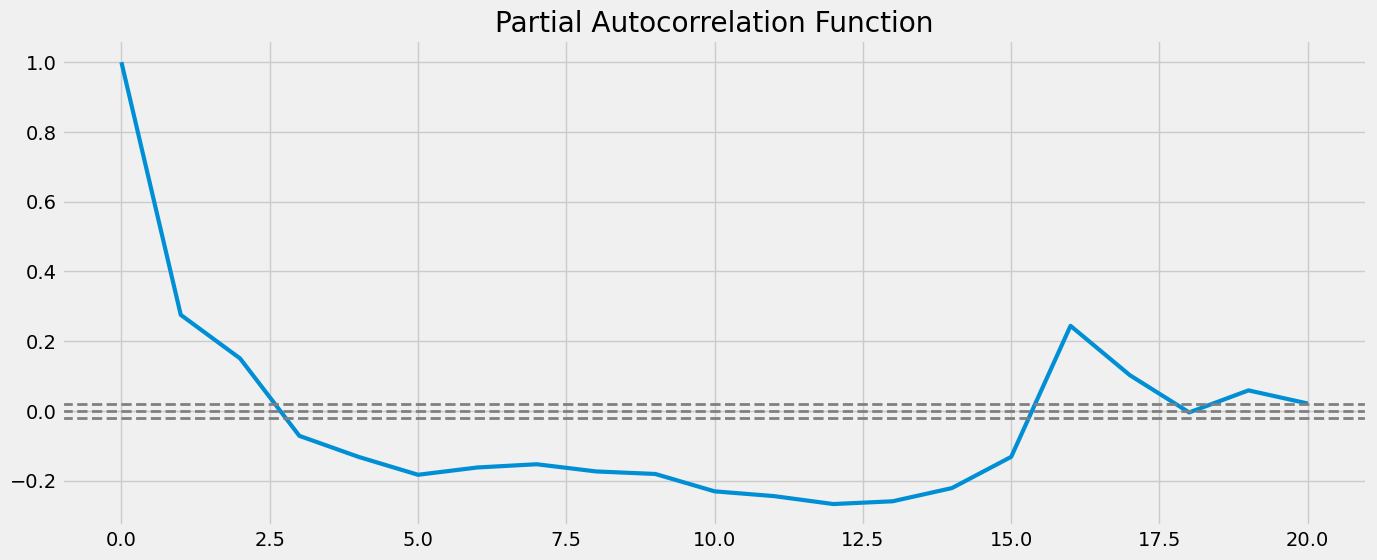

In [46]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_diff.dropna(), nlags = 20)
lag_pacf = pacf(train_diff.dropna(), nlags = 20, method= "ols")

plt.figure(figsize = (15,6))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf, linewidth = 3)
plt.axhline( y = 0, linestyle = "--", color = "gray", linewidth = 2)
plt.axhline( y= -1.96/np.sqrt(len(train_diff.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.axhline(y = 1.96 /np.sqrt(len(train_diff.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.title("Autocorrelation Function")
plt.show()

# PACF
plt.figure(figsize = (15,6))
plt.plot(lag_pacf, linewidth = 3)
plt.axhline(y = 0, linestyle = "--", color = "gray", linewidth = 2)
plt.axhline(y = -1.96/np.sqrt(len(train_diff.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.axhline( y = 1.96/np.sqrt(len(train_diff.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.title("Partial Autocorrelation Function")
plt.show()

#### ***Seasonal Analyzing:***

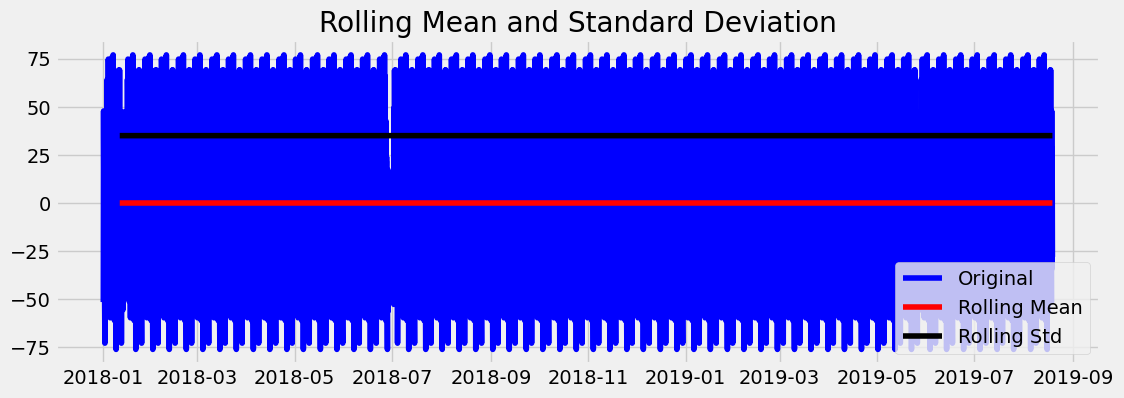

Results of Dickey Fuller test: 
Test Statistics                 -28.674437
p-value                           0.000000
# Lag Used                       38.000000
Number of Observations Used    9385.000000
Critical Value (1%)              -3.431047
Critical Value (5%)              -2.861848
Critical Value (10%)             -2.566934
dtype: float64


In [49]:
plt.figure(figsize = (12,4))
train_decompose = pd.DataFrame(seasonal)
train_decompose['date'] = train.index
train_decompose.set_index('date', inplace = True)
train_decompose.dropna(inplace = True)
test_stationary(train_decompose[0])

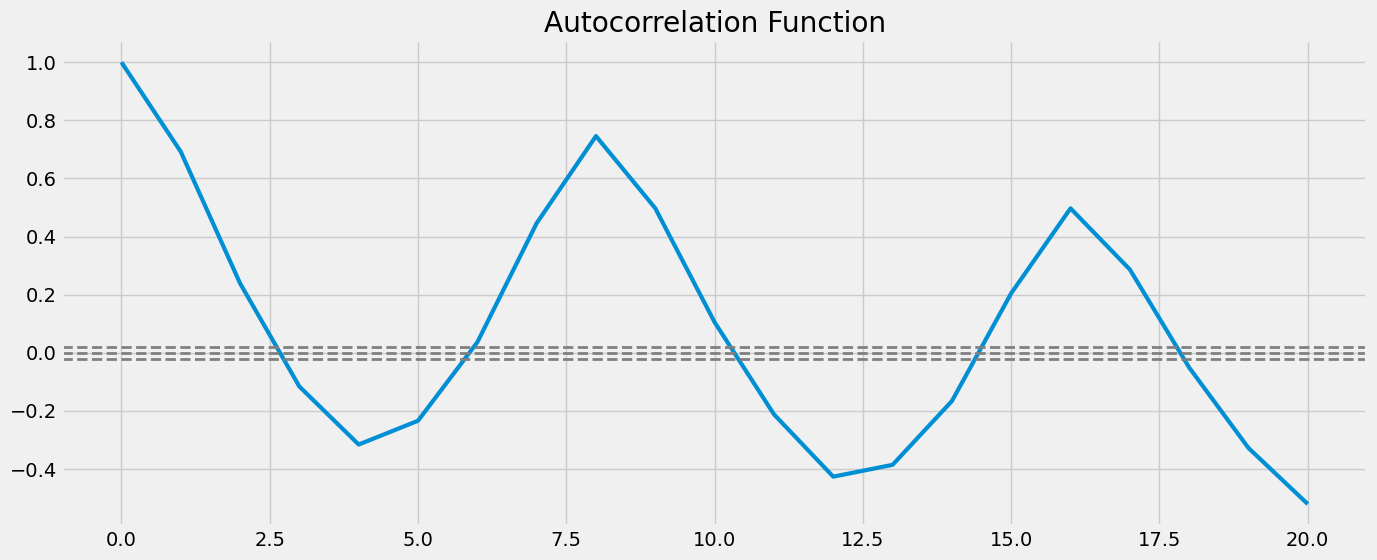

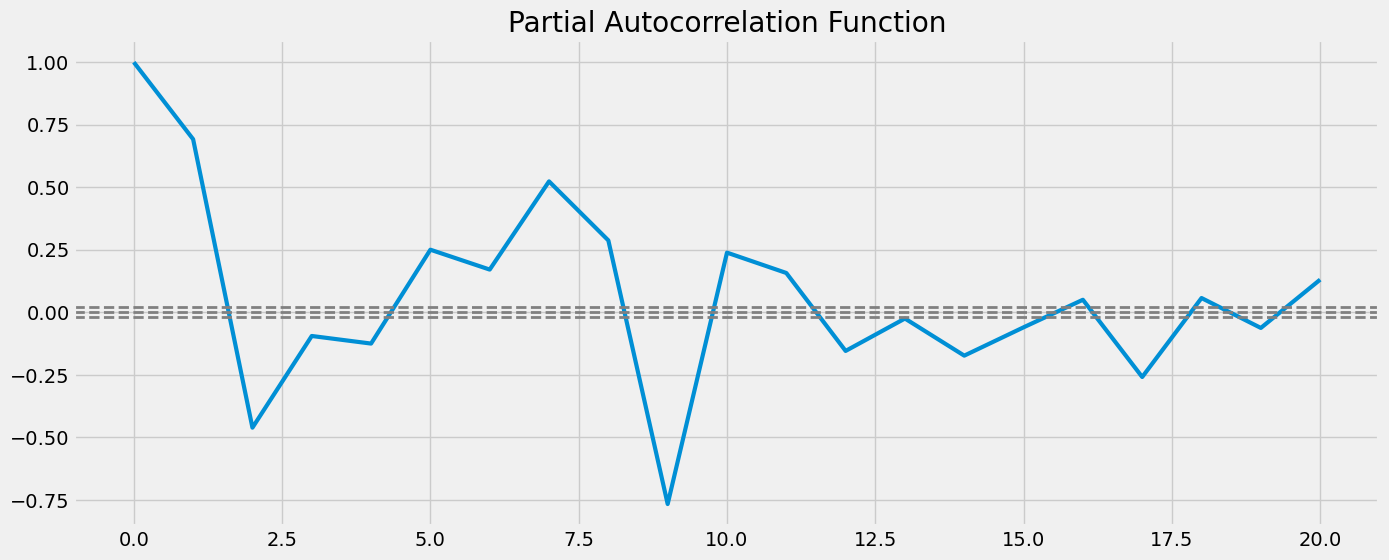

In [50]:
lag_acf = acf(train_decompose.dropna(), nlags = 20)
lag_pacf = pacf(train_decompose.dropna(), nlags = 20, method= "ols")

plt.figure(figsize = (15,6))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf, linewidth = 3)
plt.axhline( y = 0, linestyle = "--", color = "gray", linewidth = 2)
plt.axhline( y= -1.96/np.sqrt(len(train_decompose.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.axhline(y = 1.96 /np.sqrt(len(train_decompose.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.title("Autocorrelation Function")
plt.show()

# PACF
plt.figure(figsize = (15,6))
plt.plot(lag_pacf, linewidth = 3)
plt.axhline(y = 0, linestyle = "--", color = "gray", linewidth = 2)
plt.axhline(y = -1.96/np.sqrt(len(train_decompose.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.axhline( y = 1.96/np.sqrt(len(train_decompose.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.title("Partial Autocorrelation Function")
plt.show()

In [61]:
from statsmodels.tsa.arima_model import ARIMA

In [62]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['footfall'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['footfall'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (sqrt(mean_squared_error(given_set['footfall'], predict))))
    plt.show()
    
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['footfall'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (sqrt(mean_squared_error(given_set['footfall'], predict))))
    plt.show()

#### SARIMAX Model

In [65]:
import statsmodels.api as sm

fit1 = sm.tsa.statespace.SARIMAX(train.footfall, order = (5,1,7), seasonal_order =(0,0,4,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start = "2019-08-19 00:00", end = "2019-08-25 23:00", dynamic=True)
plt.figure(figsize=(15,6))
plt.plot(train['count'], label = "Train")
plt.plot(valid['count'], label = "Validation")
plt.plot(y_hat_avg['SARIMA'], label ="SARIMA") 
plt.legend(loc = "best")
plt.title("SARIMAX Model")

ValueError: Invalid model: moving average lag(s) {7} are in both the seasonal and non-seasonal moving average components.

In [ ]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
print(rms)